<a href="https://colab.research.google.com/github/ash0411/fiw/blob/main/fiwVisulalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from glob import glob
from collections import defaultdict

In [3]:
!rmdir /root/.kaggle
!mkdir /root/.kaggle
!cp kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

rmdir: failed to remove '/root/.kaggle': No such file or directory


In [5]:
!kaggle competitions download -c recognizing-faces-in-the-wild

100% 111M/111M [00:00<00:00, 114MB/s]  
100% 111M/111M [00:00<00:00, 120MB/s]
 59% 16.0M/27.1M [00:00<00:00, 49.5MB/s]
100% 27.1M/27.1M [00:00<00:00, 88.0MB/s]
  0% 0.00/1.47k [00:00<?, ?B/s]
100% 1.47k/1.47k [00:00<00:00, 1.48MB/s]
  0% 0.00/77.6k [00:00<?, ?B/s]
100% 77.6k/77.6k [00:00<00:00, 88.9MB/s]
 79% 27.0M/34.1M [00:00<00:00, 40.2MB/s]
100% 34.1M/34.1M [00:00<00:00, 69.4MB/s]
 97% 126M/130M [00:01<00:00, 88.0MB/s]
100% 130M/130M [00:01<00:00, 71.9MB/s]
  0% 0.00/8.67k [00:00<?, ?B/s]
100% 8.67k/8.67k [00:00<00:00, 8.82MB/s]
  0% 0.00/354k [00:00<?, ?B/s]
100% 354k/354k [00:00<00:00, 116MB/s]
  0% 0.00/156k [00:00<?, ?B/s]
100% 156k/156k [00:00<00:00, 41.9MB/s]
 80% 55.0M/68.6M [00:00<00:00, 68.6MB/s]
100% 68.6M/68.6M [00:00<00:00, 100MB/s] 
  0% 0.00/33.7k [00:00<?, ?B/s]
100% 33.7k/33.7k [00:00<00:00, 34.9MB/s]
 87% 26.0M/29.7M [00:00<00:00, 40.2MB/s]
100% 29.7M/29.7M [00:00<00:00, 66.5MB/s]


In [175]:
#uncomment these when running
import os
!mkdir face
#!unzip 'train.zip' -d '/content/face/train'
#!unzip 'test.zip' -d '/content/face/test'

mkdir: cannot create directory ‘face’: File exists


In [62]:
df = pd.read_csv('train_relationships.csv')

In [9]:
df.describe()

,p1,p2
count,3598,3598
unique,1725,1439
top,F0825/MID5,F0690/MID10
freq,9,8


In [13]:
def read_img(path):
    img = image.load_img(path, target_size=(224, 224))
    #plt.imshow(img)
    img = np.array(img).astype(np.float)#reshape(3,224,224)
    return img

In [17]:
# finding the number of families in training and putting them in a list
train_url =  '/content/face/train/'
family = os.listdir(train_url)
print('the number of families are {}'.format(len(family)))
print(family[:10])

the number of families are 470
['F0816', 'F0245', 'F0903', 'F0997', 'F0769', 'F0832', 'F0971', 'F0227', 'F0122', 'F0850']


the number of pictures in the testing set are  6282


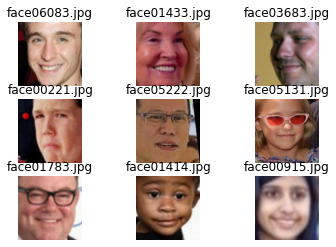

In [16]:
#finding the number of families in the test case and putting them in a list
test_url =  '/content/face/test/'
family_pics = os.listdir(test_url)
print("the number of pictures in the testing set are  {}".format(len(family_pics)))
for i in range(9):
  img = read_img(test_url + family_pics[i])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img.astype("uint8"))
  plt.title(family_pics[i])
  plt.axis('off')

In [116]:
# to list out all the members of a particular family
members = {i:sorted(os.listdir(train_url+i)) for i in family}

In [39]:
member_count = 0
member_count_per_family = []
for i in members:
  member_count_per_family.append(len(members[i]))
  member_count += len(members[i])
print('The total number of people in the training dataset are {}'.format(member_count))

The total number of people in the training dataset are 2318


In [36]:
from math import ceil

In [37]:
print('the average number of people in a family is {} for the training dataset'.format(ceil(member_count/len(family))))

the average number of people in a family is 5 for the training dataset


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


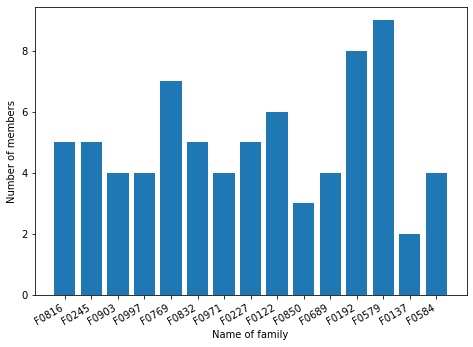

In [129]:
# this is a bar graph of the first 15 families 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = family[:15]
number = member_count_per_family[:15]
plt.xlabel('Name of family')
plt.ylabel('Number of members')
ax.bar(names,number)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()

In [55]:
# making a dictionary of member count and family
my_dict = {}
my_dict['family_name'] = family
my_dict['member_count'] = member_count_per_family

In [63]:
# making a dataframe of the family, member count
family_member_df =pd.DataFrame.from_dict(my_dict,orient='index').transpose()

In [64]:
family_member_df.head()

,family_name,member_count
0,F0816,5
1,F0245,5
2,F0903,4
3,F0997,4
4,F0769,7


In [140]:
# grouping the family member count table according to member count
mem = family_member_df.groupby('member_count').size()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f422addcc10>],
      dtype=object)

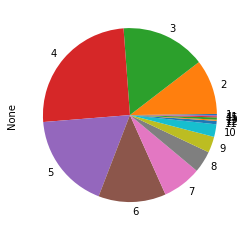

In [141]:
# plotting a pie chart representing the share of families having different member counts
mem.plot.pie(subplots = True)

In [142]:
mem

member_count
1       1
2      48
3      74
4     118
5      84
6      59
7      34
8      19
9      14
10     11
11      3
12      1
13      2
15      1
41      1
dtype: int64

In [100]:
all_images = glob(train_url + "*/*/*.jpg")

In [103]:
print('The total number of images in the training dataset are {} '.format(len(all_images)))

The total number of images in the training dataset are 12379 


In [111]:
family_member = []
for x in all_images:
  a = x.split('/')[-3] + '/' + x.split('/')[-2]
  if a in family_member:
    continue
  else:
    family_member.append(a) 

In [114]:
member_picture = {i:sorted(os.listdir(train_url+i)) for i in family_member}

In [118]:
print('the average number of pictures of a person is {} for the training dataset'.format(ceil(len(all_images)/member_count)))

the average number of pictures of a person is 6 for the training dataset


In [120]:
picture_count_per_member = []
for i in member_picture:
  picture_count_per_member.append(len(member_picture[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


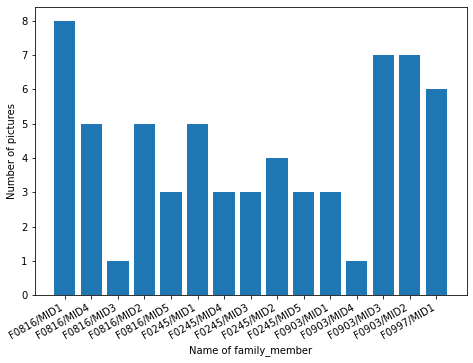

In [128]:
# this is a bar graph of the first 10 families 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = family_member[:15]
number = picture_count_per_member[:15]
plt.xlabel('Name of family_member')
plt.ylabel('Number of pictures')
ax.bar(names,number)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()

In [132]:
# making a dictionary of family,member and picture count
my_dict1 = {}
my_dict1['family_member'] = family_member
my_dict1['picture_count'] = picture_count_per_member

In [134]:
# making a dataframe of the family_member image count
family_member_image_df =pd.DataFrame.from_dict(my_dict1,orient='index').transpose()

In [143]:
# grouping the family_member picture count table according to member count
mem1 = family_member_image_df.groupby('picture_count').size()

In [144]:
mem1

picture_count
1     409
2     303
3     262
4     222
5     206
6     196
7     191
8     144
9     124
10     78
11     38
12     30
13     23
14     13
15     11
16     15
17      2
18     10
19      7
20      4
21      3
22      4
23      1
24      1
25      3
28      2
33      5
37      1
40      1
41      1
43      1
48      1
63      1
65      1
82      1
95      1
dtype: int64

In [145]:
mem1.describe()

count     36.000000
mean      64.333333
std      105.719575
min        1.000000
25%        1.000000
50%        6.000000
75%       89.500000
max      409.000000
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f422b0b1050>],
      dtype=object)

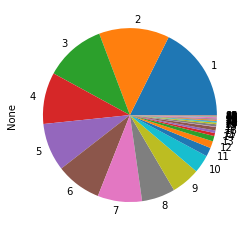

In [146]:
mem1.plot.pie(subplots = True)

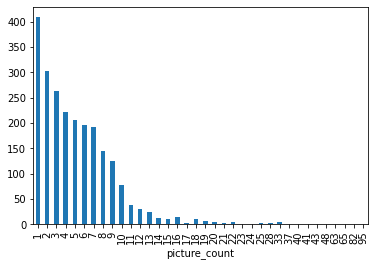

In [150]:
mem1.plot.bar()

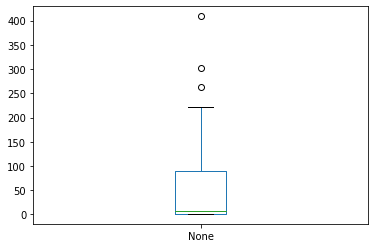

In [154]:
mem1.plot.box()

In [166]:
vgg_df = pd.read_excel('vgg_face_accuracy.xlsx')
vgg_senet_df = pd.read_excel('vgg_senet_accuracy.xlsx')

In [167]:
vgg_df.head()

,epoch,training_acc,validation_acc
0,10,80.22,75.400
1,11,82.00,75.500
2,12,83.17,77.844
3,13,83.44,77.844
4,14,83.84,78.031


In [172]:
vgg_senet_df['training_acc'] = vgg_senet_df['training_acc'] * 100
vgg_senet_df['val_acc'] = vgg_senet_df['val_acc'] * 100
vgg_senet_df.head()

,#epoch,training_acc,val_acc
0,1,58.11,59.688
1,2,65.42,61.594
2,3,69.64,69.250
3,4,73.62,71.406
4,5,74.75,72.000


[]

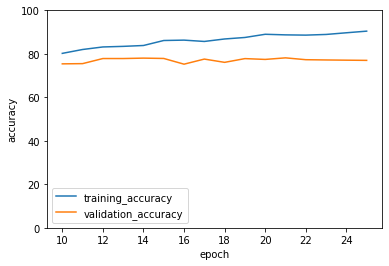

In [174]:
# plotting line graph for vgg facenet model using resnet50
ax = plt.gca()
ax.set_ylim([0,100])
plt.plot(vgg_df['epoch'],vgg_df['training_acc'])
plt.plot(vgg_df['epoch'],vgg_df['validation_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
ax.legend(['training_accuracy','validation_accuracy'])
plt.plot()

[]

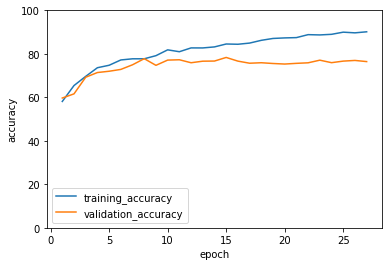

In [173]:
# plotting line graph for vgg facenet model using senet
ax = plt.gca()
ax.set_ylim([0,100])
plt.plot(vgg_senet_df['#epoch'],vgg_senet_df['training_acc'])
plt.plot(vgg_senet_df['#epoch'],vgg_senet_df['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
ax.legend(['training_accuracy','validation_accuracy'])
plt.plot()